# ML Pipeline Preparation
Follow the instructions below to help you create your ML pipeline.
### 1. Import libraries and load data from database.
- Import Python libraries
- Load dataset from database with [`read_sql_table`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql_table.html)
- Define feature and target variables X and Y

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

In [2]:
# load data from database
from sqlalchemy import create_engine
engine = create_engine('sqlite:///Raw_data_clean.db')
df = pd.read_sql("SELECT * FROM RawData", engine)

In [41]:
df.head(3)

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
categories = df.drop(columns = ['id', 'message', 'original', 'genre'])

Let's first see if there's anything wrong with those numerical values.

In [4]:
categories.describe()

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
count,26180.000000,26180.000000,26180.000000,26180.000000,26180.000000,26180.000000,26180.000000,26180.000000,26180.000000,26180.0,...,26180.000000,26180.000000,26180.000000,26180.000000,26180.000000,26180.000000,26180.000000,26180.000000,26180.000000,26180.000000
mean,0.773568,0.170512,0.004507,0.414095,0.079488,0.050076,0.027655,0.017991,0.032811,0.0,...,0.011803,0.043965,0.278304,0.082086,0.093201,0.010772,0.093659,0.020168,0.052559,0.193430
std,0.435351,0.376089,0.066986,0.492574,0.270504,0.218107,0.163985,0.132920,0.178146,0.0,...,0.108000,0.205021,0.448172,0.274500,0.290719,0.103228,0.291360,0.140578,0.223156,0.394995
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can spot something is wrong with the 'related' label as the max value 2 appears. 

In [5]:
df[df['related'] > 1].head(3)

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
117,146,Dans la zone de Saint Etienne la route de Jacm...,Nan zon st. etine rout jakmel la bloke se mize...,direct,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
218,263,. .. i with limited means. Certain patients co...,t avec des moyens limites. Certains patients v...,direct,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
304,373,The internet caf Net@le that's by the Dal road...,Cyber cafe net@le ki chita rout de dal tou pr ...,direct,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


we now correct those anomalous data as follows

In [6]:
# total entries with wrong labels
(categories['related'] > 1).sum()

188

The sum of other labels of each anomalous row:

In [7]:
a_rows = categories[categories['related'] > 1].drop(columns = 'related')
a_rows.sum(axis=1), a_rows.sum(axis=1).max(), a_rows.sum(axis=1).min()

(117      0
 218      0
 304      0
 459      0
 575      0
         ..
 20294    0
 20465    0
 22293    0
 23349    0
 25179    0
 Length: 188, dtype: int64,
 0,
 0)

We see that for those rows, all other labels are 0. Hence we conclude that the original label 'related-2' actually means 'related-0'. Then we can correct them:

In [8]:
df.loc[df['related'] > 1,'related'] = 0 # set labels 2 to 0

In [9]:
categories = df.drop(columns = ['id', 'message', 'original', 'genre'])

In [45]:
df[df['id']==lens.idxmax()]

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
17723,20814,"On geography it's a very complex country, very...",None,news,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
df[df['id'].isin(lens.sort_values().index.values[:3])]

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
10594,12185,I can bring as much as I can carry in a few tr...,None,direct,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
19214,22465,"consists of an airstrip, an Indonesian army ou...",None,news,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19402,22675,Drought conditions in the Eastern regions of G...,None,news,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
def tukey_rule(data_frame, column_name):
    data = data_frame[column_name]
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)

    IQR = Q3 - Q1

    max_value = Q3 + 1.5 * IQR
    min_value = Q1 - 1.5 * IQR

    return data_frame[(data_frame[column_name] < max_value) & (data_frame[column_name] > min_value)]

In [67]:
q3 = lens.quantile(0.9)
q1 = lens.quantile(0.1)
idr = q3 - q1
max_value = q3 + 1.5 * idr

In [89]:
lens.sort_values().values[-20:]

array([ 3963,  4011,  4102,  4151,  4153,  4227,  4236,  4746,  4769,
        5052,  5149,  5451,  5783,  6144,  6313,  6510,  6936,  6951,
       10571, 10818])

In [59]:
df[df['id'].isin(lens.sort_values().index.values[-3:])]

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
13392,16007,"After they gathered in two large pens, the ani...",None,news,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16424,19363,"The Mission found that rainfall, essential for...",None,news,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17723,20814,"On geography it's a very complex country, very...",None,news,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
df['genre'].value_counts()

news      13039
direct    10747
social     2394
Name: genre, dtype: int64

In [79]:
len(df[(df['genre'] == 'news') & (df['related'] == 1)])/df['related'].sum()

0.5361742805393439

In [80]:
len(df[(df['genre'] == 'direct') & (df['related'] == 1)])/df['related'].sum()

0.360635942845643

In [81]:
len(df[(df['genre'] == 'social') & (df['related'] == 1)])/df['related'].sum()

0.10318977661501308

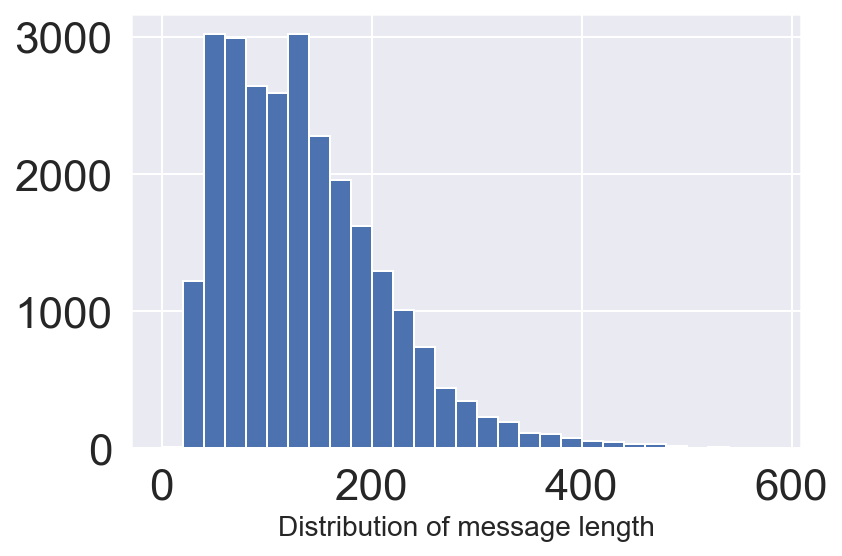

In [44]:
lens = df.message.str.len()
lens.hist(bins = np.arange(0,600,20))
plt.xlabel('Distribution of message length', fontsize = 14)
plt.show()

Now let's do some visualizations for the data. Code adapted from this [post](https://towardsdatascience.com/journey-to-the-center-of-multi-label-classification-384c40229bff).

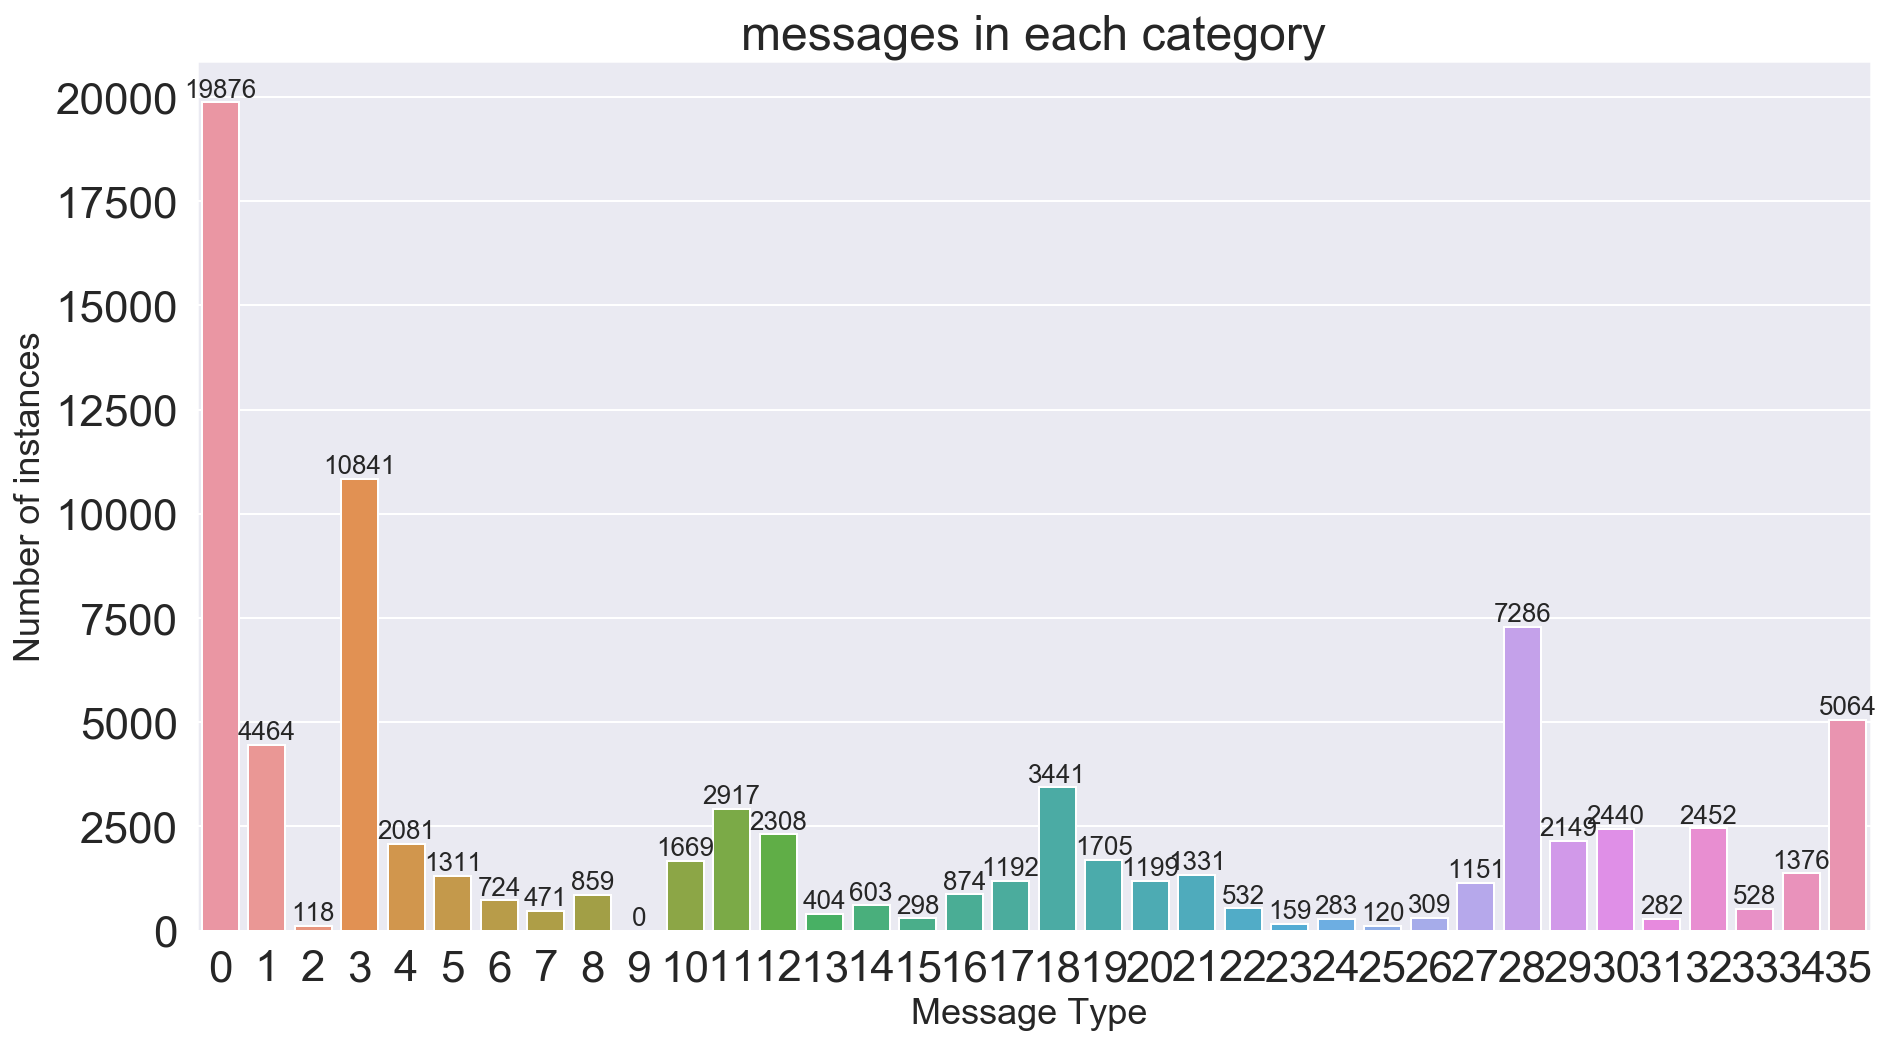

In [11]:
# cats = list(categories.columns.values)
cats = list(range(categories.shape[1])) # replace the name of categories into numbers
counts = categories.sum().values
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))
ax= sns.barplot(cats, counts)
plt.title("messages in each category", fontsize=24)
plt.ylabel('Number of instances', fontsize=18)
plt.xlabel('Message Type ', fontsize=18)
#adding the text labels
rects = ax.patches
for rect, count in zip(rects, counts):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, count, ha='center', va='bottom', fontsize=13)
plt.show()

We can see that several message types are very rare, i.e., the data set is imbalanced. There is even a category coming without any positive labels at all! (#9, 'child_alone'), which means none of the messages belongs to this category.
Let's pull the names of all imbalanced set:

In [12]:
criteria = (counts/categories.shape[0]) < 0.03 #less than 3% of data are positive lables
categories.columns.values[criteria]

array(['offer', 'search_and_rescue', 'security', 'child_alone',
       'clothing', 'money', 'missing_people', 'electricity', 'tools',
       'hospitals', 'shops', 'aid_centers', 'fire', 'cold'], dtype=object)

In [13]:
# delete the empty column
df = df.drop(columns = 'child_alone')
categories = df.drop(columns = ['id', 'message', 'original', 'genre'])

Next we inspect the distribution of multilabels, i.e., how many labels do one message get?

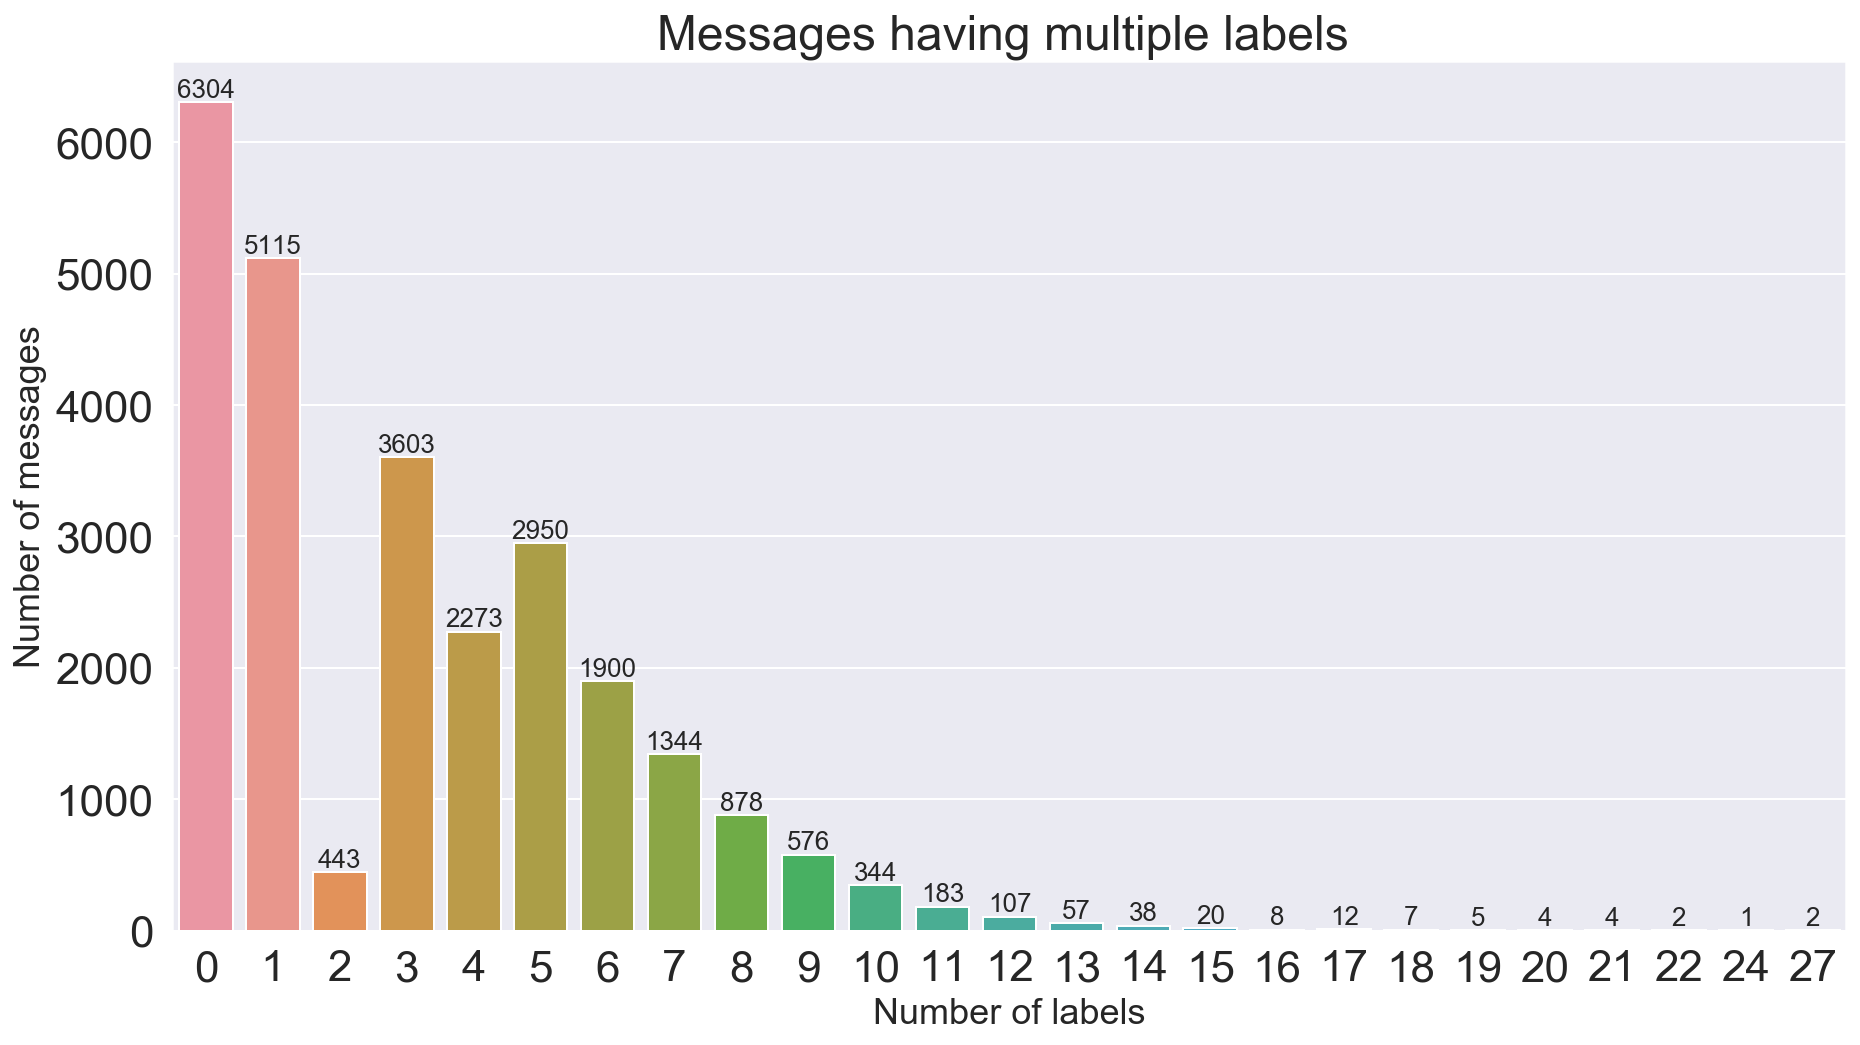

In [14]:
rowSums = categories.sum(axis=1)
multiLabel_counts = rowSums.value_counts().sort_index()
# multiLabel_counts = multiLabel_counts.iloc[1:]
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))
ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)
plt.title("Messages having multiple labels ")
plt.ylabel('Number of messages', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)
#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom', fontsize=13)
plt.show()

Except for an outlier 2, the rest of the data clearly shows the trend that the number of messages decreases with labels. And over 23% of the messages even don't have any positive labels. 

After these inspection and visualization, we now proceed to the modeling part.

Morover, if we only look at the rows where the label 'related' =0, we'll see all the rest of labels are also zero. As the name suggests, it might mean that only when the message is classified as 'related', then it is further classified into sub categories.

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

### 2. Write a tokenization function to process your text data

In [15]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

In [16]:
import re

stop_words = stopwords.words("english")
lemmatizer = WordNetLemmatizer()

def tokenize(text):
    # normalize case and remove punctuation
    text = re.sub(r"[^a-zA-Z0-9]", " ", text.lower())
    
    # tokenize text
    tokens = word_tokenize(text)
    
    # lemmatize andremove stop words
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    return tokens

### 3. Build a machine learning pipeline
This machine pipeline should take in the `message` column as input and output classification results on the other 36 categories in the dataset. You may find the [MultiOutputClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputClassifier.html) helpful for predicting multiple target variables.

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import jaccard_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [18]:
base_lr = SGDClassifier()
pipe = Pipeline([
    ('tfidf_vect', TfidfVectorizer(tokenizer = tokenize)),
    ('clf', OneVsRestClassifier(base_lr)),
])

In [ ]:
pipe = Pipeline([
    ('tfidf_vect', TfidfVectorizer(tokenizer = tokenize)),
    ('clf', RandomForestClassifier()),
])

### 4. Train pipeline
- Split data into train and test sets
- Train pipeline

In [19]:
from sklearn.model_selection import train_test_split
categories = df.drop(columns = ['id', 'message', 'original', 'genre'])
x, y = df['message'].to_numpy(), categories.to_numpy()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle = True, random_state=0)
#y_train, y_test = np.ma.make_mask(y_train, shrink=False), np.ma.make_mask(y_test, shrink=False)  

In [20]:
x_train.shape, y_train.shape, y_test.shape, x_test.shape

((18326,), (18326, 35), (7854, 35), (7854,))

In [32]:
y_train[:, 0].shape

(18326,)

In [34]:
pipe.fit(x_train, y_train[:, 0])
y_pred = pipe.predict(x_test)
# ovr_jaccard_score = jaccard_score(y_test[:, 0], y_pred, average='samples')

### 5. Test your model
Report the f1 score, precision and recall for each output category of the dataset. You can do this by iterating through the columns and calling sklearn's `classification_report` on each.

In [36]:
categories.columns.values[0]

'related'

In [ ]:
from sklearn import metrics
target_names = categories.columns.values
report = metrics.classification_report(y_test[:, 0], y_pred, target_names = target_names, output_dict=True)
report_df = pd.DataFrame(report).transpose()

In [37]:
from sklearn import metrics
target_names = categories.columns.values
report = metrics.classification_report(y_test[:, 0], y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

In [39]:
report

{'0': {'precision': 0.7256317689530686,
  'recall': 0.4185320145757418,
  'f1-score': 0.5308682733575438,
  'support': 1921},
 '1': {'precision': 0.8344203972724578,
  'recall': 0.9487611663576605,
  'f1-score': 0.8879249152141335,
  'support': 5933},
 'accuracy': 0.8190730837789661,
 'macro avg': {'precision': 0.7800260831127632,
  'recall': 0.6836465904667012,
  'f1-score': 0.7093965942858387,
  'support': 7854},
 'weighted avg': {'precision': 0.8078119232462868,
  'recall': 0.8190730837789661,
  'f1-score': 0.8005928794353572,
  'support': 7854}}

In [38]:
report_df[(report_df['precision'] == 0.0) | (report_df.index == 'macro avg')]

,precision,recall,f1-score,support
macro avg,0.780026,0.683647,0.709397,7854.0


We see from those anomalous predicted results with precision = recall = 0 all come from the categories where the positive samples are scarce. If the classifier simply labels every sample to be negative the resulting accuracy will be very high as well.

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
# For each class
precision = dict()
recall = dict()
for i in range(y_test.shape[1]):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_pred[:, i])

In [ ]:
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),
    y_pred.ravel())

In [ ]:
plt.figure()
plt.step(recall['micro'], precision['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Micro-averaged over all classes:')

In [ ]:
vectorizer = TfidfVectorizer(tokenizer = tokenize)
new_x_train = vectorizer.fit_transform(x_train)
new_x_test = vectorizer.transform(x_test)

In [ ]:
from sklearn.multioutput import ClassifierChain
chains = [ClassifierChain(RandomForestClassifier(), order='random', random_state=i) for i in range(10)]
for chain in chains:
    chain.fit(new_x_train, y_train)

y_pred_chains = np.array([chain.predict(new_x_test) for chain in
                          chains])
chain_jaccard_scores = [jaccard_score(y_test, y_pred_chain >= .5,
                                      average='samples')
                        for y_pred_chain in y_pred_chains]

In [ ]:
y_pred_ensemble = y_pred_chains.mean(axis=0)
ensemble_jaccard_score = jaccard_score(y_test,
                                       y_pred_ensemble >= .5,
                                       average='samples')

In [ ]:
model_scores = [ovr_jaccard_score] + chain_jaccard_scores
model_scores.append(ensemble_jaccard_score)

model_names = ('Independent',
               'Chain 1',
               'Chain 2',
               'Chain 3',
               'Chain 4',
               'Chain 5',
               'Chain 6',
               'Chain 7',
               'Chain 8',
               'Chain 9',
               'Chain 10',
               'Ensemble')

x_pos = np.arange(len(model_names))
fig, ax = plt.subplots(figsize=(10, 7))
ax.grid(True)
ax.set_title('Classifier Chain Ensemble Performance Comparison')
ax.set_xticks(x_pos)
ax.set_xticklabels(model_names, rotation='vertical')
ax.set_ylabel('Jaccard Similarity Score')
ax.set_ylim([min(model_scores) * .9, max(model_scores) * 1.1])
colors = ['r'] + ['b'] * len(chain_jaccard_scores) + ['g']
ax.bar(x_pos, model_scores, alpha=0.5, color=colors)
plt.tight_layout()
plt.show()

### 6. Improve your model
Use grid search to find better parameters. 

In [ ]:
df.groupby('genre')['id'].nunique()

In [ ]:
from sklearn.model_selection import GridSearchCV
from tempfile import mkdtemp
from shutil import rmtree

cachedir = mkdtemp()
pipe = Pipeline([
    ('tfidf_vect', TfidfVectorizer(tokenizer = tokenize)),    
    ('clf', OneVsRestClassifier(base_lr))], memory=cachedir)

parameters = {
    'tfidf_vect__max_df': (0.5, 0.75, 1.0),
    'tfidf_vect__max_features': (None, 5000, 10000),
    'tfidf_vect__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
    'tfidf_vect__use_idf': (True, False),
    'tfidf_vect__norm': ('l1', 'l2'), 
    'clf__estimator__alpha': (0.00001, 0.0001, 0.001),
    'clf__estimator__penalty': ('l1', 'l2', 'elasticnet'),
    'clf__estimator__max_iter': (10, 50, 100),    
}


grid_search = GridSearchCV(pipe, parameters, n_jobs=-1, verbose=1)

In [ ]:
from pprint import pprint
from time import time

print("Performing grid search...")
print("pipeline:", [name for name, _ in pipe.steps])
print("parameters:")
pprint(parameters)
t0 = time()
grid_search.fit(x_train, y_train)
print("done in %0.3fs" % (time() - t0))
print()

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

In [ ]:
rmtree(cachedir)

### 7. Test your model
Show the accuracy, precision, and recall of the tuned model.  

Since this project focuses on code quality, process, and  pipelines, there is no minimum performance metric needed to pass. However, make sure to fine tune your models for accuracy, precision and recall to make your project stand out - especially for your portfolio!

In [ ]:
best_parameters['clf']

In [ ]:
new_pipe = Pipeline([
    ('tfidf_vect', best_parameters['tfidf_vect']),
    ('clf', best_parameters['clf']),
])

In [ ]:
new_pipe.fit(x_train, y_train)
y_pred = new_pipe.predict(x_test)
ovr_jaccard_score = jaccard_score(y_test, y_pred, average='samples')

In [ ]:
ovr_jaccard_score

### 8. Try improving your model further. Here are a few ideas:
* try other machine learning algorithms
* add other features besides the TF-IDF

In [82]:
df['genre'].value_counts()

news      13039
direct    10747
social     2394
Name: genre, dtype: int64

In [83]:
len(df[(df['genre'] == 'social') & (df['related'] == 1)])/df['related'].sum()

0.10318977661501308

In [84]:
len(df[(df['genre'] == 'direct') & (df['related'] == 1)])/df['related'].sum()

0.360635942845643

In [85]:
len(df[(df['genre'] == 'news') & (df['related'] == 1)])/df['related'].sum()

0.5361742805393439

### 9. Export your model as a pickle file

### 10. Use this notebook to complete `train.py`
Use the template file attached in the Resources folder to write a script that runs the steps above to create a database and export a model based on a new dataset specified by the user.